In [1]:
# A bit of setup
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

(-1, 2)

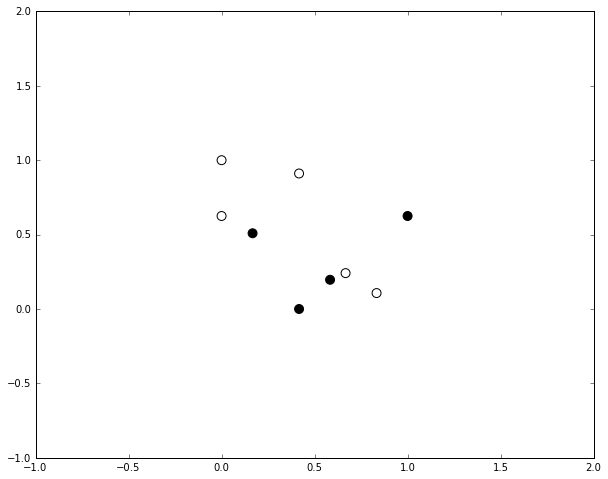

In [125]:
from __future__ import division
np.random.seed(1)
# N = 4 # number of points per class
# D = 2 # dimensionality
# K = 2 # number of classes
# X = np.zeros((N*K,D))
# y = np.zeros(N*K, dtype='uint8')
# for j in xrange(K):
#   ix = range(N*j,N*(j+1))
#   r = np.linspace(0.0,1,N) # radius
#   t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
#   X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
#   y[ix] = j


# Linearly separable case for the Logistic regression
# X = np.array([[5.4,98],
#     [5.8,120],
#     [6.2,168],
#     [5.4,200],
#     [5,210],
#     [5,168]])

# Linearly non-separable case for the NN
X = np.array([[5.5,98],
    [5.2,155],
    [5.7,120],
    [6.2,168],
    [5.5,200],
    [5,210],
    [5,168],
    [6.0,110],
    [5.8,125]])



X1 = map(lambda x: (x-np.min(X[:,0]))/(np.max(X[:,0])-np.min(X[:,0])), X[:,0])
X2 = map(lambda x: (x-np.min(X[:,1]))/(np.max(X[:,1])-np.min(X[:,1])), X[:,1])
X = np.array(zip(X1,X2))

y= [0,0,0,0,1,1,1,1,1]

fig = plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=80)
plt.xlim([-1,2])
plt.ylim([-1,2])
#fig.savefig('spiral_raw.png')

In [126]:
#Train a Linear Classifier

# initialize parameters randomly
W = 0.01 * np.random.randn(D,K)
b = np.zeros((1,K))

# some hyperparameters
step_size = 1
reg = 1e-3 # regularization strength

# gradient descent loop
num_examples = X.shape[0]
for i in xrange(20000):
  
  # evaluate class scores, [N x K]
  scores = np.dot(X, W) + b 
  
  # compute the class probabilities
  exp_scores = np.exp(scores)
  probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
  
  # compute the loss: average cross-entropy loss and regularization
  corect_logprobs = -np.log(probs[range(num_examples),y])
  data_loss = np.sum(corect_logprobs)/num_examples
  reg_loss = 0.5*reg*np.sum(W*W)
  loss = data_loss + reg_loss
  if i % 10 == 0:
    print "iteration %d: loss %f" % (i, loss)
  
  # compute the gradient on scores
  dscores = probs
  dscores[range(num_examples),y] -= 1
  dscores /= num_examples
  
  # backpropate the gradient to the parameters (W,b)
  dW = np.dot(X.T, dscores)
  db = np.sum(dscores, axis=0, keepdims=True)
  
  dW += reg*W # regularization gradient
  
  # perform a parameter update
  W += -step_size * dW
  b += -step_size * db

iteration 0: loss 0.693333
iteration 10: loss 0.633127
iteration 20: loss 0.621481
iteration 30: loss 0.618128
iteration 40: loss 0.616887
iteration 50: loss 0.616306
iteration 60: loss 0.615981
iteration 70: loss 0.615781
iteration 80: loss 0.615652
iteration 90: loss 0.615566
iteration 100: loss 0.615509
iteration 110: loss 0.615471
iteration 120: loss 0.615445
iteration 130: loss 0.615428
iteration 140: loss 0.615417
iteration 150: loss 0.615409
iteration 160: loss 0.615404
iteration 170: loss 0.615400
iteration 180: loss 0.615398
iteration 190: loss 0.615396
iteration 200: loss 0.615395
iteration 210: loss 0.615394
iteration 220: loss 0.615394
iteration 230: loss 0.615394
iteration 240: loss 0.615393
iteration 250: loss 0.615393
iteration 260: loss 0.615393
iteration 270: loss 0.615393
iteration 280: loss 0.615393
iteration 290: loss 0.615393
iteration 300: loss 0.615393
iteration 310: loss 0.615393
iteration 320: loss 0.615393
iteration 330: loss 0.615393
iteration 340: loss 0.615

In [127]:
# evaluate training set accuracy
scores = np.dot(X, W) + b
predicted_class = np.argmax(scores, axis=1)
print 'training accuracy: %.2f' % (np.mean(predicted_class == y))

training accuracy: 0.56


(-1.0, 1.9800000000000026)

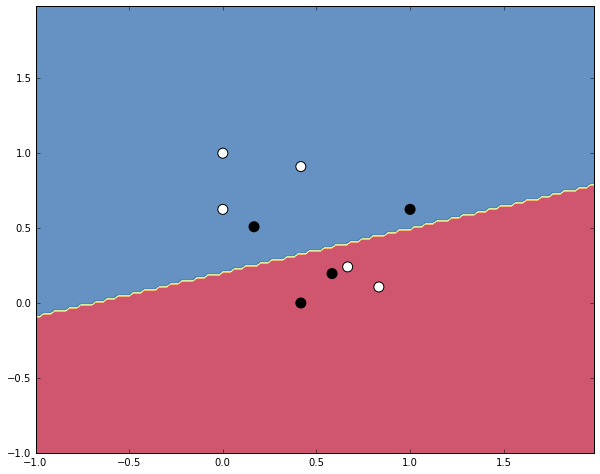

In [128]:
# plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=100)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
#fig.savefig('spiral_linear.png')

In [132]:
# initialize parameters randomly
h = 100 # size of hidden layer
W = 0.01 * np.random.randn(D,h)
b = np.zeros((1,h))
W2 = 0.01 * np.random.randn(h,K)
b2 = np.zeros((1,K))

# some hyperparameters
step_size = 1e-0
reg = 1e-3 # regularization strength

# gradient descent loop
num_examples = X.shape[0]
for i in xrange(100000):
  
  # evaluate class scores, [N x K]
  hidden_layer = np.maximum(0, np.dot(X, W) + b) # note, ReLU activation
  scores = np.dot(hidden_layer, W2) + b2
  
  # compute the class probabilities
  exp_scores = np.exp(scores)
  probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
  
  # compute the loss: average cross-entropy loss and regularization
  corect_logprobs = -np.log(probs[range(num_examples),y])
  data_loss = np.sum(corect_logprobs)/num_examples
  reg_loss = 0.5*reg*np.sum(W*W) + 0.5*reg*np.sum(W2*W2)
  loss = data_loss + reg_loss
  if i % 1000 == 0:
    print "iteration %d: loss %f" % (i, loss)
  
  # compute the gradient on scores
  dscores = probs
  dscores[range(num_examples),y] -= 1
  dscores /= num_examples
  
  # backpropate the gradient to the parameters
  # first backprop into parameters W2 and b2
  dW2 = np.dot(hidden_layer.T, dscores)
  db2 = np.sum(dscores, axis=0, keepdims=True)
  # next backprop into hidden layer
  dhidden = np.dot(dscores, W2.T)
  # backprop the ReLU non-linearity
  dhidden[hidden_layer <= 0] = 0
  # finally into W,b
  dW = np.dot(X.T, dhidden)
  db = np.sum(dhidden, axis=0, keepdims=True)
  
  # add regularization gradient contribution
  dW2 += reg * W2
  dW += reg * W
  
  # perform a parameter update
  W += -step_size * dW
  b += -step_size * db
  W2 += -step_size * dW2
  b2 += -step_size * db2

iteration 0: loss 0.693002
iteration 1000: loss 0.193088
iteration 2000: loss 0.144035
iteration 3000: loss 0.227156
iteration 4000: loss 0.149247
iteration 5000: loss 0.216681
iteration 6000: loss 0.247409
iteration 7000: loss 0.153144
iteration 8000: loss 0.216218
iteration 9000: loss 0.233516
iteration 10000: loss 0.151323
iteration 11000: loss 0.214429
iteration 12000: loss 0.170352
iteration 13000: loss 0.169951
iteration 14000: loss 0.173001
iteration 15000: loss 0.191361
iteration 16000: loss 0.245234
iteration 17000: loss 0.213404
iteration 18000: loss 0.145761
iteration 19000: loss 0.163110
iteration 20000: loss 0.151555
iteration 21000: loss 0.140317
iteration 22000: loss 0.278013
iteration 23000: loss 0.271753
iteration 24000: loss 0.178836
iteration 25000: loss 0.208159
iteration 26000: loss 0.169931
iteration 27000: loss 0.157986
iteration 28000: loss 0.258578
iteration 29000: loss 0.282604
iteration 30000: loss 0.178059
iteration 31000: loss 0.169572
iteration 32000: loss

In [133]:
# evaluate training set accuracy
hidden_layer = np.maximum(0, np.dot(X, W) + b)
scores = np.dot(hidden_layer, W2) + b2
predicted_class = np.argmax(scores, axis=1)
print 'training accuracy: %.2f' % (np.mean(predicted_class == y))

training accuracy: 1.00


(-1.0, 1.9800000000000026)

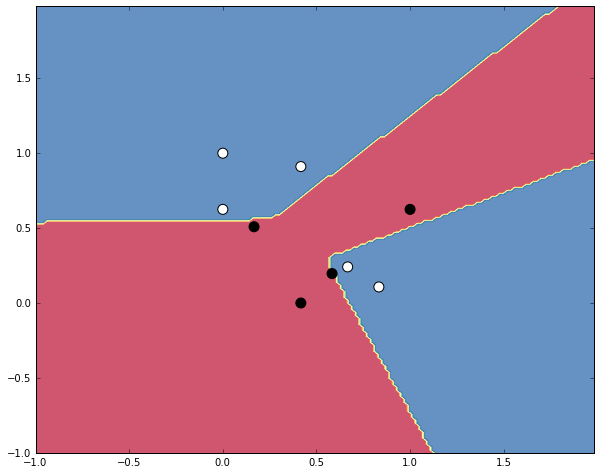

In [134]:
# plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b), W2) + b2
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=100)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
#fig.savefig('spiral_net.png')